# Models de classification en fonction du grade Gleason pour les séquences ADC

# Import des bibliothèques

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Import des données

[Text(0.5, 1.0, 'ADC Gleason Grad Score repartition')]

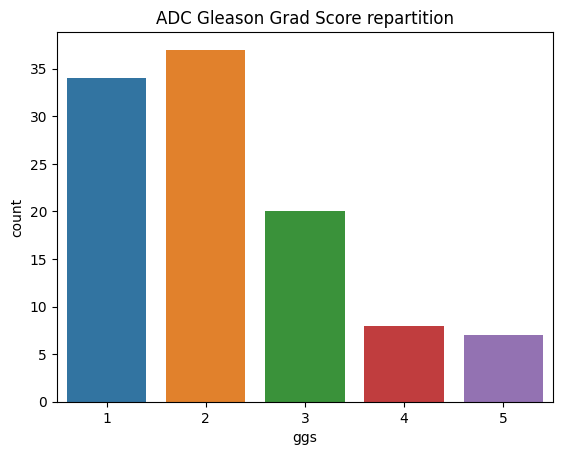

In [4]:
adc_data_dir = "lesions/ADC_T2_Images_Analyses/ADC_T2_features/Data_merge/ProstateX_Adc_Dataset.csv"

adc_df = pd.read_csv(adc_data_dir)

sns.countplot(x=adc_df['ggs']).set(title="ADC Gleason Grad Score repartition")

Après extraction en fonction du grade de Gleason et suppression des données n'ayant pas d'informations clinique "No biopsire information", nous obtenons le graphe si dessus avec la taille de chaque grade

ADC est une séquence de diffusion IRM comportant au total 202 donées Images patient dont chaque image patient contient en moyenne 15 slices

In [5]:

adc_df.drop(['Unnamed: 0','Unnamed: 0.1','sub'], axis = 1, inplace = True)

adc_df.head(10)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ggs
0,0.719743,0.357319,4.263928,11.933127,11.704700,13.000000,13.038405,14.456832,242.916667,8.588782,...,0.008242,0.601642,326.527463,0.006430,0.060265,0.027398,2923.718292,0.398650,16.720445,2
1,0.708549,0.580443,6.836738,11.778474,11.180340,13.928388,12.165525,14.628739,367.750000,8.345626,...,0.004253,0.485130,433.955693,0.003359,0.069338,0.018360,1980.488031,0.355046,7.727419,2
2,0.789598,0.319727,2.333814,7.299406,7.071068,8.246211,8.062258,8.306624,63.083333,5.763597,...,0.020387,0.746075,633.954509,0.020024,0.024204,0.050676,4752.658710,1.640305,31.720642,3
3,0.969988,0.494479,3.704772,7.492269,8.246211,8.944272,9.055385,9.899495,128.500000,7.267414,...,0.012983,0.687908,489.780229,0.010729,0.034545,0.036234,5489.679127,0.887261,25.306577,2
4,0.887318,0.424655,4.091311,9.634443,8.944272,11.661904,11.000000,13.564660,148.166667,8.548816,...,0.019531,0.713646,495.836555,0.017406,0.054975,0.028145,6057.194133,1.218808,20.135698,4
5,0.650924,0.395981,2.824410,7.132689,8.062258,7.615773,5.385165,8.306624,54.875000,4.642839,...,0.034283,0.646630,649.157559,0.009249,0.033731,0.057134,3145.556508,2.213902,26.618777,3
6,0.597836,0.305440,1.429036,4.678619,5.099020,4.123106,3.162278,5.196152,10.500000,2.797049,...,0.073665,0.892857,780.642857,0.073444,0.074374,0.074579,2023.004280,27.287429,44.673133,1
7,0.415011,0.264242,2.127439,8.051087,5.000000,8.602325,5.385165,8.602325,22.125000,3.341289,...,0.038642,0.807540,517.303571,0.038048,0.030558,0.116519,2255.039281,3.128019,49.041620,2
8,0.660963,0.449051,5.784645,12.881941,10.440307,10.770330,14.317821,14.456832,310.583333,8.514481,...,0.014148,0.583484,218.361684,0.011486,0.106004,0.017609,2677.052704,0.380060,8.871287,2
9,0.848702,0.498528,3.638932,7.299360,8.544004,8.602325,7.071068,9.055385,91.625000,6.194985,...,0.018436,0.683782,403.385662,0.017151,0.026624,0.056425,3742.245226,0.922652,41.157663,1


# Mise à l'échel des données

In [6]:
from imblearn.over_sampling import SMOTE
import sklearn as sk

y = adc_df['ggs']
adc_df.drop(['ggs'], axis=1, inplace=True)

smote = SMOTE(sampling_strategy={1:35,3:35,4:15,5:12})

X_resampled, y_resampled = smote.fit_resample(adc_df, y)

[Text(0.5, 1.0, 'ADC Gleason Grad Score repartition')]

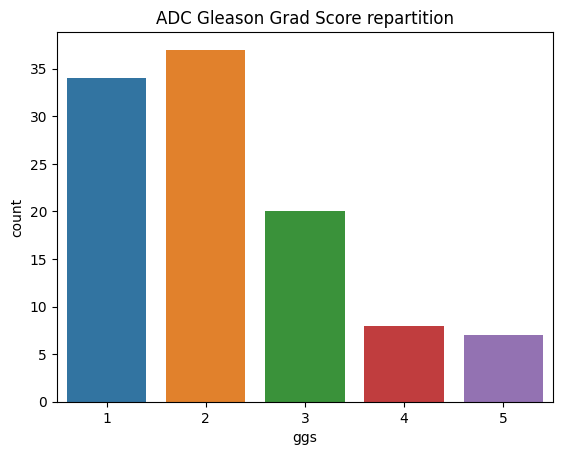

In [8]:
adc_df = pd.concat((X_resampled, y_resampled), axis=1)
adc_df = sk.utils.shuffle(adc_df)
adc_df = sk.utils.shuffle(adc_df)
sns.countplot(x=t2w_df['ggs']).set(title="ADC Gleason Grad Score repartition")

# La matrice de corrélation entre nos marqueurs quantitatifs

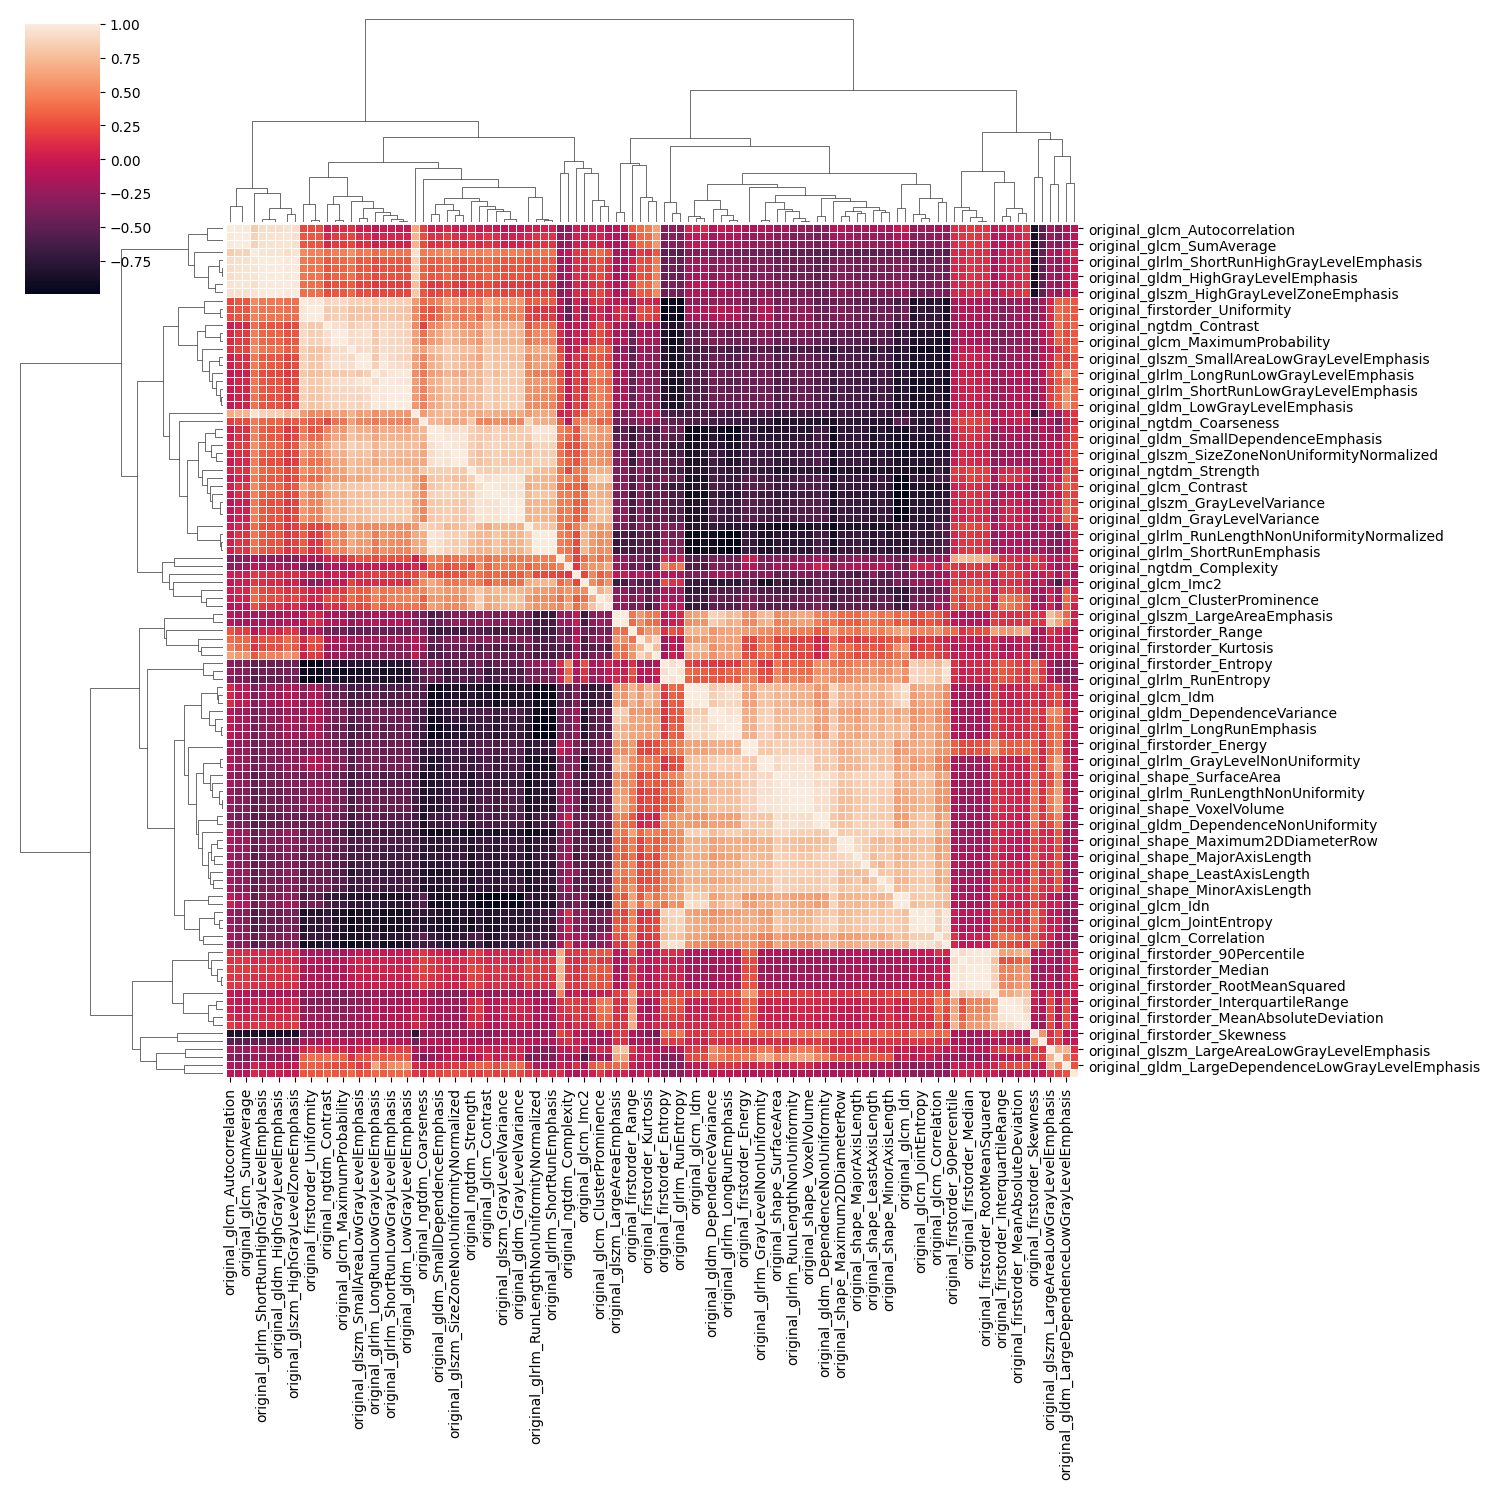

In [9]:
# Choose a subset of features for clustering
d = adc_df

dd = d.iloc[:,2:]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(15,15))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
pp.savefig("adcPx_crr.png")

plt.show()

# Déterminons les variables les moins corrélés

In [10]:
corrMatrix = adc_df.corr()

correlated_features = set()
no_correlated_features = set()

for i in range(len(corrMatrix .columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.7:
            colname = corrMatrix.columns[i]
            no_correlated_features.add(colname)

adc_df.drop(labels=no_correlated_features, axis=1, inplace=True)

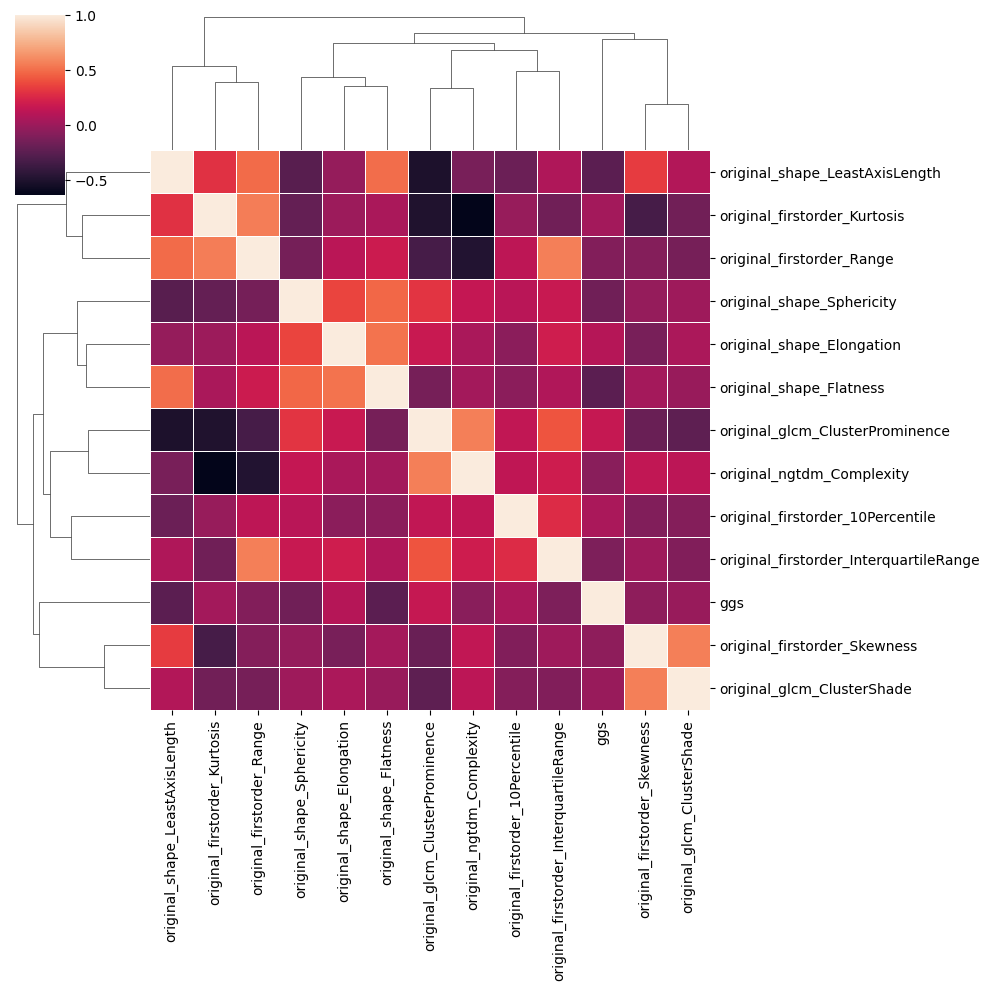

In [11]:
pp = sns.clustermap(adc_df.corr(), linewidths=.5, figsize=(10,10))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

# pp.savefig("T2PI_crr.png")

plt.show()

# Voici les marqueurs les moins corrélés

In [12]:
adc_df.columns

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_Sphericity',
       'original_firstorder_10Percentile',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Range',
       'original_firstorder_Skewness', 'original_glcm_ClusterProminence',
       'original_glcm_ClusterShade', 'original_ngtdm_Complexity', 'ggs'],
      dtype='object')

In [13]:
len(adc_df.columns)

13

# Modèles de classification

Sur la base des marqueurs les moins corrélés, nous allons faire le training de nos modèles de classification

# Matrice de confusion

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

def conf_matrix(matrix,pred):
    class_names= [0,1,2,3,4,5]# name  of classes
    fig, ax = plt.subplots(figsize=(5,3))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
#     plt.savefig('/home/sama/Documents/Stage_CIC/Data-Archive/01-SAMA_RAD_WORKS/Prostate_Data_Analyses/ProstateX_Features/image.png')
    plt.show()

# Normalisation de nos données

In [15]:
from imblearn.over_sampling import SMOTE
import sklearn as sk

y = adc_df['ggs']
adc_df.drop(['ggs'], axis=1, inplace=True)

In [16]:
for column in adc_df.columns:
    adc_df[column] = (adc_df[column] - adc_df[column].min()) / (adc_df[column].max() - adc_df[column].min()) 

In [17]:
adc_df = pd.concat((adc_df, y), axis=1)

In [18]:
len(adc_df)

134

In [19]:
X_train, X_val, y_train, y_val = train_test_split(adc_df,y,test_size=0.15,random_state=0,shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=0,shuffle = True)

# Modèle Random Forest

In [20]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pickle

rf = RandomForestClassifier(class_weight="balanced",n_estimators=200,random_state = 1)
rf.fit(X_train,y_train)

# Enregistrement du modèle sur disque
filename = 'adc_Px_rf_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

y_pred=rf.predict(X_val)
acc = metrics.accuracy_score(y_pred,y_val.values.ravel())*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
print("accuracy Score is {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%
accuracy Score is 100.00%


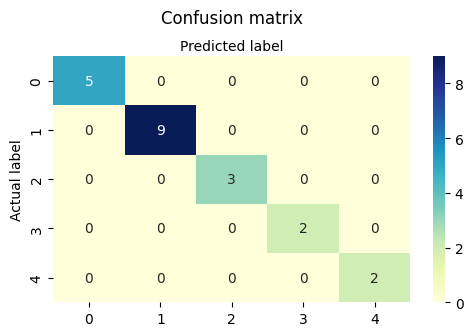

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

accuracy Score is 100.00%


In [21]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_val)
conf_matrix(cnf_matrix,y_val)
# calculate prediction
report = classification_report(y_pred,y_val)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Modèle d'arbre de décision

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_val)

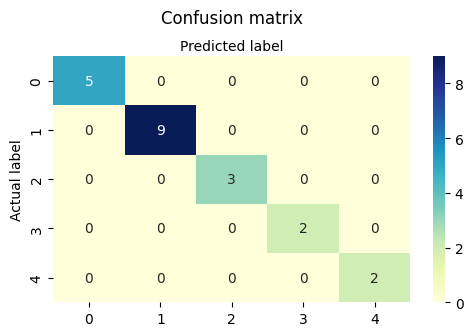

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

accuracy Score is 100.00%


In [23]:
accuracy = accuracy_score(y_val, y_pred)*100
cnf_matrix = metrics.confusion_matrix(y_pred,y_val)
conf_matrix(cnf_matrix,y_val)
# calculate prediction
report = classification_report(y_pred,y_val)
print(report)

print("accuracy Score is {:.2f}%".format(accuracy))

# Modèle CatBooster

In [24]:
import catboost as cb

CtBt_model = cb.CatBoostClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1)
CtBt_model.fit(X_train, y_train)

0:	learn: 1.4546539	total: 59.3ms	remaining: 59.2s
1:	learn: 1.3645107	total: 77.6ms	remaining: 38.7s
2:	learn: 1.2506591	total: 88.6ms	remaining: 29.4s
3:	learn: 1.2024543	total: 96.9ms	remaining: 24.1s
4:	learn: 1.1144769	total: 104ms	remaining: 20.6s
5:	learn: 1.0773197	total: 108ms	remaining: 17.9s
6:	learn: 1.0339187	total: 113ms	remaining: 16s
7:	learn: 0.9328875	total: 119ms	remaining: 14.7s
8:	learn: 0.9031170	total: 123ms	remaining: 13.5s
9:	learn: 0.8659652	total: 127ms	remaining: 12.6s
10:	learn: 0.8442079	total: 131ms	remaining: 11.8s
11:	learn: 0.8166289	total: 134ms	remaining: 11.1s
12:	learn: 0.7672328	total: 138ms	remaining: 10.5s
13:	learn: 0.7290769	total: 141ms	remaining: 9.96s
14:	learn: 0.6874132	total: 147ms	remaining: 9.63s
15:	learn: 0.6585122	total: 150ms	remaining: 9.23s
16:	learn: 0.6097975	total: 155ms	remaining: 8.97s
17:	learn: 0.5625643	total: 158ms	remaining: 8.64s
18:	learn: 0.5236822	total: 161ms	remaining: 8.31s
19:	learn: 0.4977071	total: 167ms	remai

198:	learn: 0.0119197	total: 1.04s	remaining: 4.18s
199:	learn: 0.0118377	total: 1.05s	remaining: 4.22s
200:	learn: 0.0117440	total: 1.06s	remaining: 4.2s
201:	learn: 0.0116649	total: 1.07s	remaining: 4.21s
202:	learn: 0.0115870	total: 1.07s	remaining: 4.19s
203:	learn: 0.0115091	total: 1.08s	remaining: 4.21s
204:	learn: 0.0114325	total: 1.08s	remaining: 4.19s
205:	learn: 0.0113575	total: 1.09s	remaining: 4.2s
206:	learn: 0.0112837	total: 1.09s	remaining: 4.19s
207:	learn: 0.0112110	total: 1.1s	remaining: 4.18s
208:	learn: 0.0111222	total: 1.12s	remaining: 4.24s
209:	learn: 0.0110502	total: 1.12s	remaining: 4.23s
210:	learn: 0.0109804	total: 1.13s	remaining: 4.22s
211:	learn: 0.0109101	total: 1.13s	remaining: 4.21s
212:	learn: 0.0108410	total: 1.13s	remaining: 4.19s
213:	learn: 0.0107736	total: 1.14s	remaining: 4.17s
214:	learn: 0.0107062	total: 1.14s	remaining: 4.16s
215:	learn: 0.0106399	total: 1.14s	remaining: 4.14s
216:	learn: 0.0105748	total: 1.14s	remaining: 4.13s
217:	learn: 0.0

373:	learn: 0.0051993	total: 1.61s	remaining: 2.7s
374:	learn: 0.0051798	total: 1.62s	remaining: 2.69s
375:	learn: 0.0051634	total: 1.62s	remaining: 2.69s
376:	learn: 0.0051475	total: 1.62s	remaining: 2.68s
377:	learn: 0.0051313	total: 1.63s	remaining: 2.68s
378:	learn: 0.0051153	total: 1.63s	remaining: 2.67s
379:	learn: 0.0051081	total: 1.64s	remaining: 2.67s
380:	learn: 0.0050923	total: 1.64s	remaining: 2.66s
381:	learn: 0.0050735	total: 1.64s	remaining: 2.66s
382:	learn: 0.0050549	total: 1.65s	remaining: 2.65s
383:	learn: 0.0050354	total: 1.65s	remaining: 2.65s
384:	learn: 0.0050202	total: 1.66s	remaining: 2.64s
385:	learn: 0.0050052	total: 1.66s	remaining: 2.64s
386:	learn: 0.0049899	total: 1.66s	remaining: 2.63s
387:	learn: 0.0049747	total: 1.67s	remaining: 2.63s
388:	learn: 0.0049597	total: 1.67s	remaining: 2.63s
389:	learn: 0.0049419	total: 1.67s	remaining: 2.62s
390:	learn: 0.0049270	total: 1.68s	remaining: 2.61s
391:	learn: 0.0049125	total: 1.68s	remaining: 2.61s
392:	learn: 0

546:	learn: 0.0032906	total: 2.22s	remaining: 1.84s
547:	learn: 0.0032826	total: 2.22s	remaining: 1.83s
548:	learn: 0.0032760	total: 2.23s	remaining: 1.84s
549:	learn: 0.0032695	total: 2.24s	remaining: 1.83s
550:	learn: 0.0032616	total: 2.25s	remaining: 1.83s
551:	learn: 0.0032533	total: 2.25s	remaining: 1.82s
552:	learn: 0.0032469	total: 2.26s	remaining: 1.82s
553:	learn: 0.0032405	total: 2.27s	remaining: 1.83s
554:	learn: 0.0032341	total: 2.29s	remaining: 1.84s
555:	learn: 0.0032276	total: 2.29s	remaining: 1.83s
556:	learn: 0.0032213	total: 2.3s	remaining: 1.83s
557:	learn: 0.0032150	total: 2.31s	remaining: 1.83s
558:	learn: 0.0032087	total: 2.31s	remaining: 1.82s
559:	learn: 0.0032025	total: 2.31s	remaining: 1.82s
560:	learn: 0.0031963	total: 2.32s	remaining: 1.81s
561:	learn: 0.0031901	total: 2.33s	remaining: 1.81s
562:	learn: 0.0031838	total: 2.33s	remaining: 1.81s
563:	learn: 0.0031776	total: 2.33s	remaining: 1.8s
564:	learn: 0.0031715	total: 2.33s	remaining: 1.8s
565:	learn: 0.0

733:	learn: 0.0023462	total: 3.02s	remaining: 1.09s
734:	learn: 0.0023428	total: 3.04s	remaining: 1.09s
735:	learn: 0.0023394	total: 3.04s	remaining: 1.09s
736:	learn: 0.0023351	total: 3.05s	remaining: 1.09s
737:	learn: 0.0023308	total: 3.05s	remaining: 1.08s
738:	learn: 0.0023275	total: 3.06s	remaining: 1.08s
739:	learn: 0.0023232	total: 3.06s	remaining: 1.07s
740:	learn: 0.0023192	total: 3.06s	remaining: 1.07s
741:	learn: 0.0023159	total: 3.07s	remaining: 1.07s
742:	learn: 0.0023119	total: 3.07s	remaining: 1.06s
743:	learn: 0.0023086	total: 3.07s	remaining: 1.06s
744:	learn: 0.0023047	total: 3.08s	remaining: 1.05s
745:	learn: 0.0023014	total: 3.08s	remaining: 1.05s
746:	learn: 0.0022981	total: 3.08s	remaining: 1.04s
747:	learn: 0.0022940	total: 3.09s	remaining: 1.04s
748:	learn: 0.0022901	total: 3.1s	remaining: 1.04s
749:	learn: 0.0022868	total: 3.1s	remaining: 1.03s
750:	learn: 0.0022829	total: 3.11s	remaining: 1.03s
751:	learn: 0.0022788	total: 3.11s	remaining: 1.03s
752:	learn: 0.

891:	learn: 0.0018857	total: 3.8s	remaining: 460ms
892:	learn: 0.0018835	total: 3.8s	remaining: 456ms
893:	learn: 0.0018813	total: 3.81s	remaining: 451ms
894:	learn: 0.0018786	total: 3.81s	remaining: 447ms
895:	learn: 0.0018764	total: 3.81s	remaining: 443ms
896:	learn: 0.0018742	total: 3.82s	remaining: 438ms
897:	learn: 0.0018721	total: 3.82s	remaining: 434ms
898:	learn: 0.0018699	total: 3.82s	remaining: 430ms
899:	learn: 0.0018677	total: 3.83s	remaining: 425ms
900:	learn: 0.0018656	total: 3.84s	remaining: 422ms
901:	learn: 0.0018634	total: 3.84s	remaining: 417ms
902:	learn: 0.0018613	total: 3.85s	remaining: 413ms
903:	learn: 0.0018591	total: 3.85s	remaining: 409ms
904:	learn: 0.0018570	total: 3.86s	remaining: 405ms
905:	learn: 0.0018549	total: 3.87s	remaining: 401ms
906:	learn: 0.0018527	total: 3.87s	remaining: 397ms
907:	learn: 0.0018500	total: 3.88s	remaining: 393ms
908:	learn: 0.0018475	total: 3.89s	remaining: 389ms
909:	learn: 0.0018453	total: 3.89s	remaining: 385ms
910:	learn: 0.

In [25]:
y_pred = CtBt_model.predict(X_val)
acc = metrics.accuracy_score(y_pred,y_val.values.ravel())*100
print("accuracy Score is {:.2f}%".format(acc))

accuracy Score is 100.00%


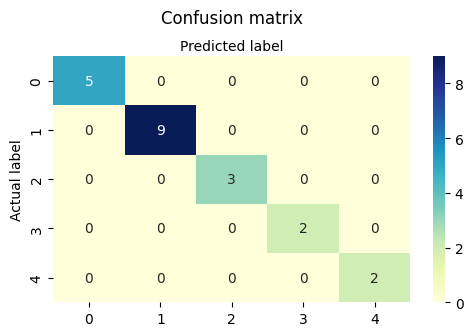

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

accuracy Score is 100.00%


In [26]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_val)
conf_matrix(cnf_matrix,y_val)
# calculate prediction
report = classification_report(y_pred,y_val)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Modèle LightGBM

In [27]:
import lightgbm as lgb

LtGBM_model = lgb.LGBMClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1)
LtGBM_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, n_estimators=1000)

In [28]:
y_pred = LtGBM_model.predict(X_val)
acc = metrics.accuracy_score(y_pred,y_val.values.ravel())*100
print("accuracy Score is {:.2f}%".format(acc))

accuracy Score is 100.00%


# Modèle AdaBoostClassifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=1000, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000, random_state=42)

In [30]:
y_pred = adaboost.predict(X_val)

acc = metrics.accuracy_score(y_pred,y_val.values.ravel())*100
print("accuracy Score is {:.2f}%".format(acc))

accuracy Score is 47.62%


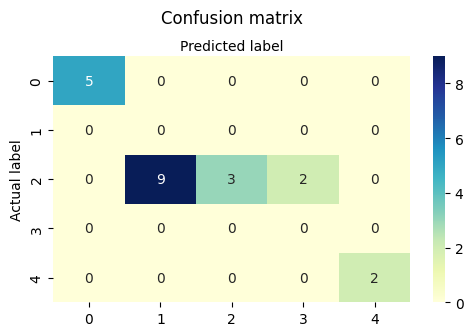

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         0
           3       1.00      0.21      0.35        14
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2

    accuracy                           0.48        21
   macro avg       0.60      0.44      0.47        21
weighted avg       1.00      0.48      0.57        21

accuracy Score is 47.62%


/home/sama/Documents/Stage_CIC/radiomicenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sama/Documents/Stage_CIC/radiomicenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sama/Documents/Stage_CIC/radiomicenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [31]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_val)
conf_matrix(cnf_matrix,y_val)
# calculate prediction
report = classification_report(y_pred,y_val)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# GradientBoostingRegressor

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

gb_regressor = GradientBoostingRegressor(n_estimators=1000, random_state=42)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [33]:
y_pred = adaboost.predict(X_val)

acc = metrics.accuracy_score(y_pred,y_val.values.ravel())*100
print("accuracy Score is {:.2f}%".format(acc))

# mse = mean_squared_error(y_test, y_pred)
# print("MSE:", mse)

accuracy Score is 47.62%


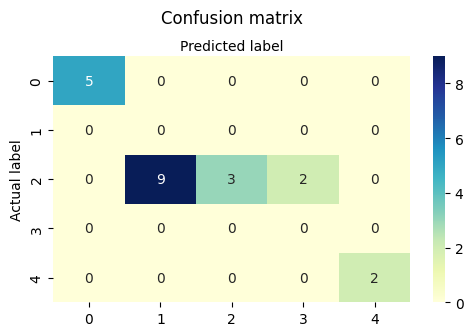

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         0
           3       1.00      0.21      0.35        14
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2

    accuracy                           0.48        21
   macro avg       0.60      0.44      0.47        21
weighted avg       1.00      0.48      0.57        21

accuracy Score is 47.62%


/home/sama/Documents/Stage_CIC/radiomicenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sama/Documents/Stage_CIC/radiomicenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sama/Documents/Stage_CIC/radiomicenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [34]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_val)
conf_matrix(cnf_matrix,y_val)
# calculate prediction
report = classification_report(y_pred,y_val)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# HistGradientBoostingClassifier

In [35]:
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification

hist_gb_classifier = HistGradientBoostingClassifier(random_state=42)
hist_gb_classifier.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [36]:
y_pred = hist_gb_classifier.predict(X_val)

acc = metrics.accuracy_score(y_pred,y_val.values.ravel())*100
print("accuracy Score is {:.2f}%".format(acc))

accuracy Score is 100.00%


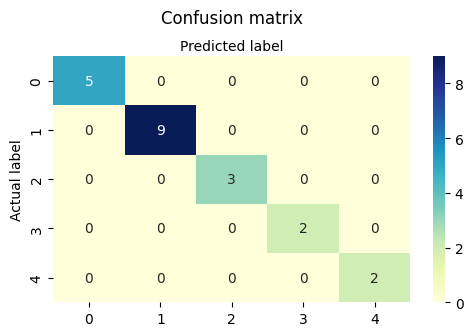

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

accuracy Score is 100.00%


In [37]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_val)
conf_matrix(cnf_matrix,y_val)
# calculate prediction
report = classification_report(y_pred,y_val)
print(report)

print("accuracy Score is {:.2f}%".format(acc))